<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Calculo/Actividad_06_Diferenciacio%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.differentiate import derivative
from scipy.interpolate import CubicSpline

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Orly de Jesus Rivera Cruz
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
#Ejercicio 1

funcion = lambda x: np.cos(x)

preimagenes = np.linspace(0 , 2*np.pi , 10) 

"""
Funcion five_point_derivate

Entrada:
f = La función principal
x = Array de los puntos que seran derivados
h = El diferencial de longitud

Salida:
diff = Array de pendientes de los puntos

"""

def five_point_derivate( f , x , h ):
    
    diff = np.zeros_like(x)

    for n in range( 0 , len(x) ):
        if n == 0:
            diff[n] = ( -25*f(x[n]) + 48*f(x[n] + h) - 36*f(x[n] + 2*h) + 16*f(x[n] + 3*h) - 3*f(x[n] + 4*h) ) / (12*h)
        elif n == len(x) - 1:
            diff[n] = ( 25*f(x[n]) - 48*f(x[n] - h) + 36*f(x[n] - 2*h) - 16*f(x[n] - 3*h) + 3*f(x[n] - 4*h) ) / (12*h)
        else:
            diff[n] = ( f(x[n] - 2*h) - 8*f(x[n] - h) + 8*f(x[n] + h) - f(x[n] + 2*h) ) / (12*h)
    return diff

Tolerancias = np.logspace( 0 , -3 , 10 )                                    #Diferenciales para la derivada

Derivadas_puntuales = []
Errores = []

for h in Tolerancias:
    Derivada = five_point_derivate( funcion , preimagenes , h)              #Se calcula la derivada en los puntos con algun h
    Interpolacion = CubicSpline(preimagenes , Derivada)                     #Se interpolan los puntos para evaluar pi/8
    Derivadas_puntuales.append( Interpolacion(np.pi/8) )                    #Se calcula el punto por medio de la interpolación
    Errores.append( 1000*abs( - np.sin(np.pi/8) - Interpolacion(np.pi/8)) )      #Se calcula el error con el valor real de la derivada

Tabla = pd.DataFrame({ "Tolerancias(h)": Tolerancias , "Derivada_Int(pi/8)": Derivadas_puntuales ,"Derivada_Real(pi/8)": -np.sin(np.pi/8) , "Error (1e-3)": Errores})

print(Tabla)
print("\nComo se puede observar el error disminuye bastante aproximadamente en h = 0.5, de hay para adelante el error va subiendo\n" \
"Esto se debe a las aproximaciones erroneas que hace la maquina\n")

#-------------

dfuncion = lambda x: -np.sin(x)                                             #Primera derivada analitica de cos(x)

Derivada2 = five_point_derivate( dfuncion , preimagenes , 0.05)             #Derivamos la primera derivada en los puntos con h=0.05
Interpolacion2 = CubicSpline(preimagenes , Derivada2 )                      #Realizamos nuevamente una interpolación
Derivada2_puntual = Interpolacion2(np.pi/8)                                 #Evaluamos el punto
Error2 = abs( -np.cos( np.pi/8 ) - Derivada2_puntual )                      #Calculamos el error

print("El valor de la segunda derivada en pi/8 es de:",Derivada2_puntual ,"\nSu error absoluto es de:", Error2)

print()

Derivadas_puntuales2 = []
Errores2 = []

for h in Tolerancias:                                                   #El mismo ciclo que hicimos antes pero ahora con la segunda derivada
    Derivada2 = five_point_derivate( dfuncion , preimagenes , h)
    Interpolacion2 = CubicSpline(preimagenes , Derivada2)
    Derivadas_puntuales2.append( Interpolacion2(np.pi/8) )
    Errores2.append(1000*( abs( - np.cos(np.pi/8) - Interpolacion2(np.pi/8)  ) ) )

Tabla = pd.DataFrame({ "Tolerancias(h)": Tolerancias , "Derivada(pi/8)": Derivadas_puntuales2 , "Error (1e-3)": Errores2})

print(Tabla)
print("\nComo se puede observar el error disminuye bastante aproximadamente en h = 0.5 nuevamente, por lo que podemos concluir que el metodo de derivadas\n" \
"con 5 puntos es efectivo con un h no muy grande ya que converge muy rapido ")

   Tolerancias(h)    Derivada_Int(pi/8)  Derivada_Real(pi/8)  Error (1e-3)
0        1.000000    -0.334324647635664            -0.382683     48.358785
1        0.464159    -0.384356327321048            -0.382683      1.672895
2        0.215443   -0.3863768584450037            -0.382683      3.693426
3        0.100000  -0.38643839584836487            -0.382683      3.754963
4        0.046416   -0.3864403994216835            -0.382683      3.756967
5        0.021544   -0.3864404732394485            -0.382683      3.757041
6        0.010000  -0.38644047624840927            -0.382683      3.757044
7        0.004642   -0.3864404763790734            -0.382683      3.757044
8        0.002154   -0.3864404763849211            -0.382683      3.757044
9        0.001000   -0.3864404763851779            -0.382683      3.757044

Como se puede observar el error disminuye bastante aproximadamente en h = 0.5, de hay para adelante el error va subiendo
Esto se debe a las aproximaciones erroneas que hace l

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

   Tolerancias(h)   Derivada_Punt.(2)   Derivada_Scipy(2)    Derivada_Gra.(2)  \
0        0.010000  22.166855173686166  22.167168296791065   22.16778405577715   
1        0.012915  22.166994750503605   22.16716829304825   22.16819544578674   
2        0.016681  22.167329929310874  22.167168296778133  22.168881703342418   
3        0.021544   22.16802123970039  22.167168277442745    22.1700264503416   
4        0.027826   22.16934517996735  22.167168265919305  22.171935152419223   
5        0.035938  22.171774271377057  22.167168079490597  22.174985693659778   
6        0.046416  22.176111411850655   22.16716789107928   22.18039866193303   
7        0.059948  22.183715163800123  22.167166231646465  22.189669567817752   
8        0.077426  22.196877409913217  22.167165335126736  22.219365556965023   
9        0.100000  22.219456670409578  22.167168296791065  22.228786880307325   

   Error_DP   Error_G       Error_S  
0  0.000313  0.000616  8.846257e-13  
1  0.000174  0.001027  3.743700e

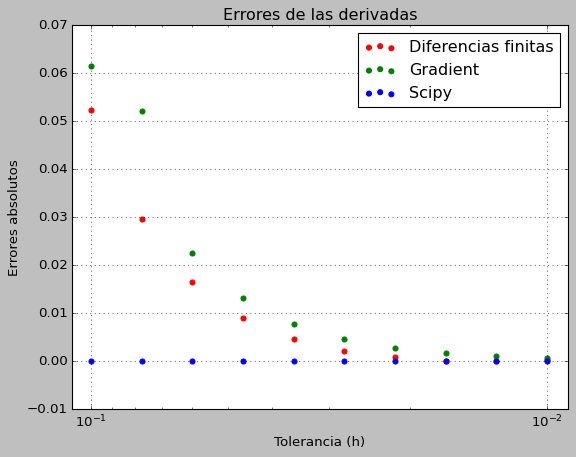

Vemos como el metodo de scipy gana por su error muy bajo, despues le sigue nuestra funcion de diferencias finitas y despues se encuentra el np.gradient
Pero para los 3 el valor mas optimo para h es el de 0.01 ya que el error es lo mas bajo que puede ser


In [4]:
#Ejercicio 2 - Primera derivada

funcion = lambda x: x * np.exp(x)
dfuncion = lambda x: (x+1)*np.exp(x)

preimagenes = np.linspace(1.8 , 2.2 , 6) 

"""
Funcion Diferencias_finitas

Entrada:
f = La función principal
x = Array de los puntos que seran derivados
h = El diferencial de longitud

Salida:
diff = Array de pendientes de los puntos

"""

def Diferencias_finitas( f , x , h ):
    
    diff = np.zeros_like(x)

    for n in range( 0 , len(x) ):
        if n == 0:
            diff[n] = ( f(x[n] + h) - f(x[n]    ) ) / (h)
        elif n == len(x) - 1:
            diff[n] = ( f(x[n]    ) - f(x[n] - h) ) / (h)
        else:
            diff[n] = ( f(x[n] + h) - f(x[n] - h) ) / (2*h)
    return diff

Tolerancias = np.logspace( -2 , -1 , 10 )                                    #Diferenciales para la derivada

Derivadas_puntuales = []
Error_DP = []
Gradient = []
Error_G = []
Scipy = []
Error_S = []

for h in Tolerancias:
    #DIFERENCIAS FINITAS
    Derivada = Diferencias_finitas( funcion , preimagenes , h)              #Se calcula la derivada en los puntos con algun h
    Interpolacion = CubicSpline(preimagenes , Derivada)                     #Se interpolan los puntos para evaluar pi/8
    Derivadas_puntuales.append( Interpolacion(2.0) )                    #Se calcula el punto por medio de la interpolación
    Error_DP.append( abs( dfuncion(2.0) - Interpolacion(2.0)) )      #Se calcula el error con el valor real de la derivada
    
    #--------------
    x = np.arange(1.8 , 2.2+h , h )                     #Se necesita que sea espaciado con h
    #--------------
    
    #NUMPY.GRADIENT
    Derivada_G = np.gradient(funcion(x), h)
    Interpolacion = CubicSpline(x , Derivada_G ) 
    Gradient.append(Interpolacion(2))
    Error_G.append( abs( dfuncion(2.0) - Interpolacion(2.0)) )
    #SCIPY  
    Derivada_S = derivative(funcion , x)
    Interpolacion = CubicSpline(x , Derivada_S.df ) 
    Scipy.append(Interpolacion(2))
    Error_S.append( abs( dfuncion(2.0) - Interpolacion(2.0)) )


Tabla = pd.DataFrame({ "Tolerancias(h)": Tolerancias , "Derivada_Punt.(2)": Derivadas_puntuales ,"Derivada_Scipy(2)":Scipy,
"Derivada_Gra.(2)": Gradient , "Error_DP": Error_DP, "Error_G": Error_G, "Error_S": Error_S})

print(Tabla)

#-------------------------------------
plt.style.use("classic")

plt.scatter(Tolerancias , Error_DP , color = "red" , label="Diferencias finitas")
plt.scatter(Tolerancias , Error_G , color = "green" , label="Gradient")
plt.scatter(Tolerancias , Error_S , color = "blue" , label="Scipy")

plt.xscale("log")

plt.title("Errores de las derivadas")

plt.xlabel("Tolerancia (h)")
plt.ylabel("Errores absolutos")

plt.xlim(1e-1 + 1e-2 , 1e-2 - 1e-3)
plt.legend()
plt.grid()
plt.show()

print("Vemos como el metodo de scipy gana por su error muy bajo, despues le sigue nuestra funcion de diferencias finitas y despues se encuentra el np.gradient")
print("Pero para los 3 el valor mas optimo para h es el de 0.01 ya que el error es lo mas bajo que puede ser")

   Tolerancias(h)   Derivada_Punt.(2)   Derivada_Scipy(2)    Derivada_Gra.(2)  \
0        0.010000  29.555848945499076    29.5562243957217  29.556963306258588   
1        0.012915   29.55601658215092  29.556224391444157  29.557456974044648   
2        0.016681  29.556418983275982  29.556224395706796  29.558280481640015   
3        0.021544  29.557248796205194  29.556224373613095  29.559654167963593   
4        0.027826  29.558837832906015  29.556224360452937  29.561944457708684   
5        0.035938   29.56175313299084  29.556224147342395   29.56559793168227   
6        0.046416  29.566958179903995  29.556223932211815   29.57211212135721   
7        0.059948  29.576083219665716    29.5562220361095   29.58317639385491   
8        0.077426  29.591878367292683  29.556221022022566  29.619661772838583   
9        0.100000  29.618973351949432    29.5562243957217   29.63016423174926   

   Error_DP   Error_G       Error_S  
0  0.000375  0.000739  9.023893e-13  
1  0.000208  0.001233  4.278444e

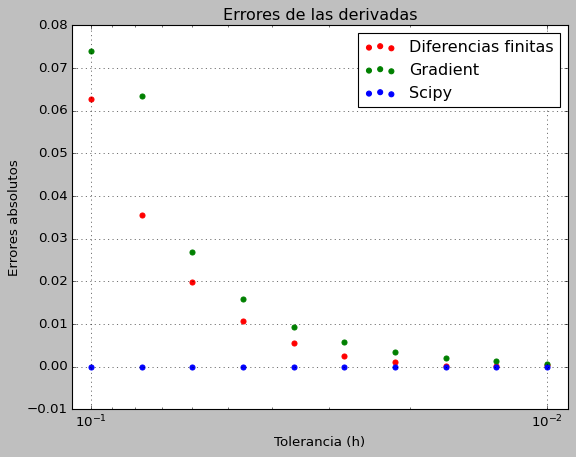

Vemos como el metodo de scipy gana por su error muy bajo, despues le sigue nuestra funcion de diferencias finitas y despues se encuentra el np.gradient
Pero para los 3 el valor mas optimo para h es el de 0.01 ya que el error es lo mas bajo que puede ser
Para la segunda derivada se uso el mismo proceso que el de la primera solo que cambiando la funcion por su derivada


In [5]:
#Ejercicio 2 - Segunda derivada

d2funcion = lambda x: (x+2)*np.exp(x)

Tolerancias = np.logspace( -2 , -1 , 10 )                                    #Diferenciales para la derivada

Derivadas_puntuales = []
Error_DP = []
Gradient = []
Error_G = []
Scipy = []
Error_S = []

for h in Tolerancias:
    #DIFERENCIAS FINITAS
    Derivada = Diferencias_finitas( dfuncion , preimagenes , h)              #Se calcula la derivada en los puntos con algun h
    Interpolacion = CubicSpline(preimagenes , Derivada)                     #Se interpolan los puntos para evaluar pi/8
    Derivadas_puntuales.append( Interpolacion(2.0) )                    #Se calcula el punto por medio de la interpolación
    Error_DP.append( abs( d2funcion(2.0) - Interpolacion(2.0)) )      #Se calcula el error con el valor real de la derivada
    #-------------
    x = np.arange(1.8 , 2.2+h , h )                         #Se necesita que sea espaciado con h
    #-------------
    #NUMPY.GRADIENT
    Derivada_G = np.gradient(dfuncion(x), h)
    Interpolacion = CubicSpline(x , Derivada_G ) 
    Gradient.append(Interpolacion(2))
    Error_G.append( abs( d2funcion(2.0) - Interpolacion(2.0)) )
    #SCIPY  
    Derivada_S = derivative(dfuncion , x)
    Interpolacion = CubicSpline(x , Derivada_S.df ) 
    Scipy.append(Interpolacion(2))
    Error_S.append( abs( d2funcion(2.0) - Interpolacion(2.0)) )


Tabla = pd.DataFrame({ "Tolerancias(h)": Tolerancias , "Derivada_Punt.(2)": Derivadas_puntuales ,"Derivada_Scipy(2)":Scipy,
"Derivada_Gra.(2)": Gradient , "Error_DP": Error_DP, "Error_G": Error_G, "Error_S": Error_S})

print(Tabla)

#-------------------------------------

plt.scatter(Tolerancias , Error_DP , color = "red" , label="Diferencias finitas")
plt.scatter(Tolerancias , Error_G , color = "green" , label="Gradient")
plt.scatter(Tolerancias , Error_S , color = "blue" , label="Scipy")

plt.xscale("log")

plt.title("Errores de las derivadas")

plt.xlabel("Tolerancia (h)")
plt.ylabel("Errores absolutos")

plt.xlim(1e-1 + 1e-2 , 1e-2 - 1e-3)
plt.legend()
plt.grid()
plt.show()

print("Vemos como el metodo de scipy gana por su error muy bajo, despues le sigue nuestra funcion de diferencias finitas y despues se encuentra el np.gradient")
print("Pero para los 3 el valor mas optimo para h es el de 0.01 ya que el error es lo mas bajo que puede ser")

print("Para la segunda derivada se uso el mismo proceso que el de la primera solo que cambiando la funcion por su derivada")